In [1]:
execfile('pysrc/RPC_Hydro.py')

In [5]:
0.7 * 2.5e-21 / cons.m_p.to('g') * 4*2*un.pc.to('cm')

<Quantity 2.58274068e+22 1 / g>

In [2]:
qRP = pp.Run('B2D_N2048_R100_100',501,r=100.,v0=u.ld.pc/u.ld.yr,L0=u.ld.pc,rho0=1e-20,L=2.5e+12*u.ld.Lsun,optFrac=0.514)#,varsToRead=('rho','NHI'))#'ionx','prs'))
#qRP2 = pp.Run('B2D_N2048_R300_050',501,r=300.,v0=u.ld.pc/u.ld.yr,L0=u.ld.pc,rho0=1e-20,L=2.5e+12*u.ld.Lsun,
#           optFrac=0.514)#,varsToRead=('rho','NHI'))#'ionx','prs'))

In [3]:
qGP = pp.Run('B2D_N2048_R10000_050',901,r=10000.,v0=u.ld.pc/u.ld.yr,L0=u.ld.pc,rho0=1e-20,L=2.5e+12*u.ld.Lsun,
           optFrac=0.514)#,varsToRead=('rho',))#'ionx','prs'))
#qGP2 = pp.Run('B2D_N2048_R300_000',1751,r=300.,v0=u.ld.pc/u.ld.yr,L0=u.ld.pc,rho0=1e-20,L=2.5e+12*u.ld.Lsun,
#           optFrac=0.514)#,varsToRead=('rho',))#'ionx','prs'))

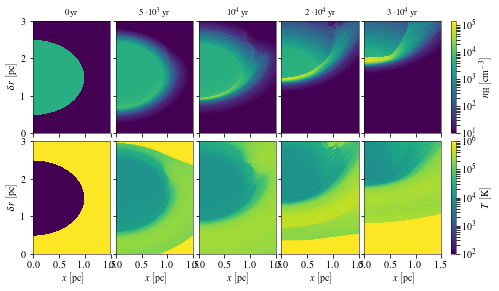

In [16]:
execfile('pysrc/RPC_Hydro.py')
iSnapshots = [0,50,100,200,300]
cb = nTplot2D_new(qRP,iSnapshots,('nH','T'),rngs=((10,1.5e5),(100,1e6)))
# u.savefig(u.figureDir+'images_nT_%s.png'%qRP.name,dpi=600)

* change to Namekata like tables

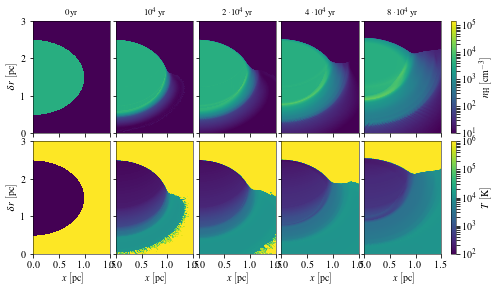

In [8]:
execfile('pysrc/RPC_Hydro.py')
iSnapshots = [0,100,200,400,800]
cb = nTplot2D_new(qGP,iSnapshots,('nH','T'),rngs=((10,1.5e5),(100,1e6)))
# u.savefig(u.figureDir+'images_nT_%s.png'%qGP.name,dpi=600)

* change GP sim to small radii

In [47]:
qRP2 = pp.Run('B2D_N2048_R100_050',501,r=100.,v0=u.ld.pc/u.ld.yr,L0=u.ld.pc,rho0=1e-20,L=2.5e+12*u.ld.Lsun,optFrac=0.514)#,varsToRead=('rho','NHI'))#'ionx','prs'))

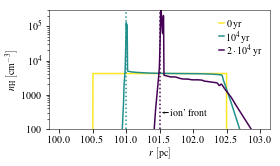

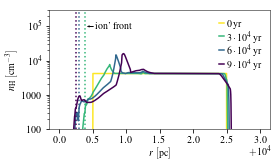

In [82]:
execfile('pysrc/RPC_Hydro.py')
iSnapshots = [0,100,200]
for irun,run in enumerate((qRP2,qGP)):
    iSnapshots = ([0,100,200],[0,300,600,900])[irun]
    skewers((run,),'r',('nH',),rngs=((100,3e5),), iTs=iSnapshots,ix=20,isRPC=1-irun)
    u.mysavefig('skewers_vs_dr_%s'%run.name,bbox_inches='tight')

* need more snapshots in RPC sim
* change GP sim to small radii

In [30]:
qRP = pp.Run('B2D_N2048_R100_100',501,r=100.,v0=u.ld.pc/u.ld.yr,L0=u.ld.pc,rho0=1e-20,L=2.5e+12*u.ld.Lsun,optFrac=0.514,
             varsToRead=('rho','NHI'))#'ionx','prs'))

loading snapshot #0
loading snapshot #10
loading snapshot #50
loading snapshot #100
loading snapshot #200


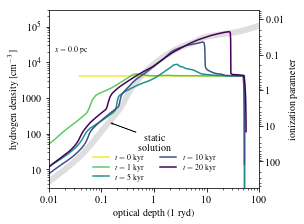

In [31]:
execfile('pysrc/RPC_Hydro.py')
comparison_to_static_solution_by_time(qRP,iTs=(0,10,50,100,200),var='nH',rng=(10,1.5e5),ix=10)
u.mysavefig('comparison_to_static_solution_by_time_%s'%qRP.name,bbox_inches='tight')

* update RP solution
* recalculate static solution with same equations as in sim

In [2]:
qRP = pp.Run('B2D_N2048_R100_100',501,r=100.,v0=u.ld.pc/u.ld.yr,L0=u.ld.pc,rho0=1e-20,L=2.5e+12*u.ld.Lsun,optFrac=0.514)

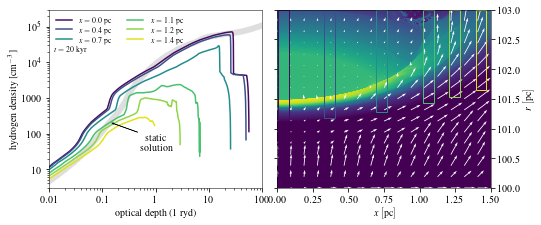

In [13]:
execfile('pysrc/RPC_Hydro.py')
comparison_to_static_solution_by_x(qRP,iT=200,var='nH',rng=(10,1.5e5),ixs=(30,250,500,725,850,975))
savefig(u.figureDir+'comparison_to_static_solution__by_x_%s.png'%qRP.name,bbox_inches='tight',dpi=600)

* plot the actual velocities, and the luminosities

In [113]:
run = qGP
iSnapshots = np.arange(0,1000,100)
ts = iSnapshots*100*un.yr
fronts = np.zeros(iSnapshots.shape)
fronts[0] = 0.5
for iiSnapshot,iSnapshot in enumerate(iSnapshots):
    front = (run[iSnapshot].fHII.cgs()[:,20]<0.1).nonzero()[0]
    front = (run[iSnapshot].nH.cgs()[:,20]>300).nonzero()[0]
    if iSnapshot>0 and len(front):
        fronts[iiSnapshot] = run[iSnapshot].x.cgs()[front[0]]
v = 4*un.km/un.s 
analytic = fronts[0] - (v*ts).to('pc').value

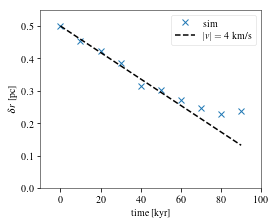

In [262]:
figure(figsize=(rc.fig_width/2,3))
plot(ts/1000.,fronts,'x',label='sim')
plot(ts/1000.,analytic,'-',c='k',ls='--',label=r'$|v|=4$ km/s')
legend()
xlabel(r'time [kyr]')
ylabel(r'$\delta r$ [pc]')
ylim(0,0.55)
xlim(-10,100)
u.mysavefig('ion_front_velocity_%s'%run.name,bbox_inches='tight')

why is ionization front in gas pressure dominated sim moving a factor of 2.5 too slow?

In [2]:
qs = [pp.Run('B2D_N2048_R%d_%s'%(r,('050','100')[r==100]),1001,r=r,
             v0=u.ld.pc/u.ld.yr,L0=u.ld.pc,rho0=1e-20,L=2.5e+12*u.ld.Lsun,optFrac=0.514) 
      for r in 100,300,1000,3000,10000]

In [6]:
execfile('pysrc/RPC_Hydro.py')
res = r_dependence_calc(qs,iTs=[100,200,300])
u.send(res,'pyobjs/dependence_on_r_new.pyobj')

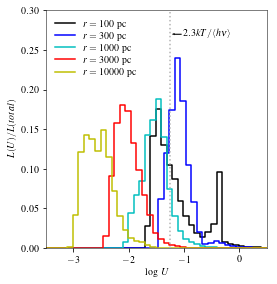

In [11]:
execfile('pysrc/RPC_Hydro.py')
r_dependence_figs_new(u.pickle.load(file('pyobjs/dependence_on_r_new.pyobj')),qs[:],save=False)
u.mysavefig('luminosity_weighted_U',bbox_inches='tight')

* when not normalizing by total luminosity, we get a total luminosity x30 L_bol
* need at least one more sim in RPC limit
* maybe change to different L (10^43 - 10^47) instead of different r

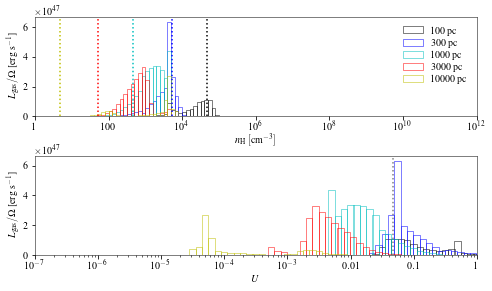

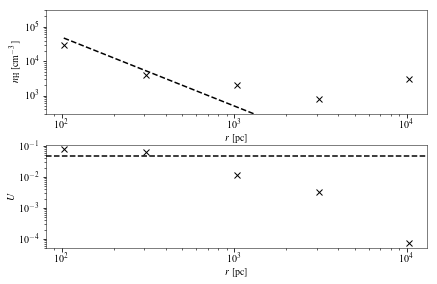

In [207]:
r_dependence_figs(u.pickle.load(file('pyobjs/dependence_on_r.pyobj')),qs,save=False)

figures 10-11: luminosity-weighted density and ionization distribution
* label vertical lines
* total area should be 10^46 erg/s
* add 30 pc run?

In [2]:
execfile('pysrc/RPC_Hydro.py')

In [12]:
OIII_Table= pp.Table.Table(('nH','U0','NH','NHI'),
                            projectDir+'data/OIII5007_table.txt',
                           firstLine=1,calculatedValueColumn=0)
    

In [13]:
OIII_Table.propertyValues

[array([-2.50003813, -1.50003813, -0.50003813]),
 array([-1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 array([17.        , 17.49996187, 18.        , 18.49996187, 19.        ,
        19.49996187, 20.        , 20.49996187, 21.        , 21.49996187,
        22.        , 22.49996187, 23.        ]),
 array([15.        , 15.49996187, 16.        , 16.49996187, 17.        ,
        17.49996187, 18.        , 18.49996187, 19.        , 19.49996187,
        20.        , 20.49996187, 21.        , 21.49996187, 22.        ,
        22.49996187, 23.        ])]

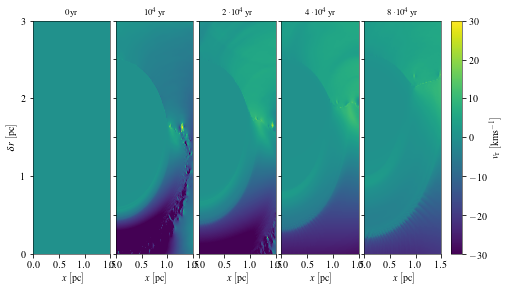

In [13]:
execfile('pysrc/RPC_Hydro.py')
iSnapshots = [0,100,200,400,800]
cb = nTplot2D_new(qGP,iSnapshots,('v_r',),rngs=((-30,30),))
# u.savefig(u.figureDir+'images_nT_%s.png'%qGP.name,dpi=600)

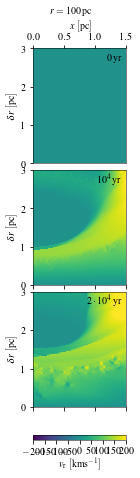

In [12]:
cb = nTplot2D((qRP,),iSnapshots,('v_r',),rngs=((-200,200),))
# u.savefig(u.figureDir+'images_nT.png')

# for Omer

In [2]:
qRP = pp.Run('B2D_N2048_R100_100',601,r=100.,v0=u.ld.pc/u.ld.yr,L0=u.ld.pc,rho0=1e-20,L=2.5e+12*u.ld.Lsun,
           optFrac=0.514)#,varsToRead=('rho','NHI'))#'ionx','prs'))

In [57]:
execfile('pysrc/RPC_Hydro.py')
import os

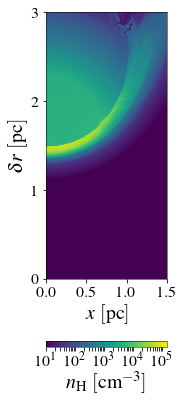

In [58]:
forOmer(qRP,iT=200,var='nH',rng=(10,1.5e5),ix=205)

# for Movie

In [27]:
framesForMovieMultiProcessor(6,(qRP,qGP),min_iT=0,max_iT=375,variables=('nH',),rngs=((10,1.5e5),))

In [3]:
framesForMovieMultiProcessor(6,(qGP,),min_iT=0,max_iT=1296,variables=('nH',),rngs=((10,1.5e5),))

loading snapshot #0
loading snapshot #5
loading snapshot #15
loading snapshot #10
loading snapshot #20
loading snapshot #25
loading snapshot #30
loading snapshot #35
loading snapshot #40
loading snapshot #45
loading snapshot #50
loading snapshot #55
loading snapshot #60
loading snapshot #65
loading snapshot #70
loading snapshot #75
loading snapshot #80
loading snapshot #85
loading snapshot #90
loading snapshot #95
loading snapshot #100
loading snapshot #105
loading snapshot #110
loading snapshot #115
loading snapshot #120
loading snapshot #125
loading snapshot #130
loading snapshot #135
loading snapshot #140
loading snapshot #145
loading snapshot #150
loading snapshot #155
loading snapshot #160
loading snapshot #165
loading snapshot #170
loading snapshot #175
loading snapshot #180
loading snapshot #185
loading snapshot #190
loading snapshot #195
loading snapshot #200
loading snapshot #205
loading snapshot #210
loading snapshot #215
loading snapshot #220
loading snapshot #225
loading sn

In [3]:
qRP = pp.Run('B2D_N2048_R100_100',500,r=100.,v0=u.ld.pc/u.ld.yr,L0=u.ld.pc,rho0=1e-20,L=2.5e+12*u.ld.Lsun,
           optFrac=0.514,varsToRead=('rho','NHI'))

In [29]:
framesForRPCMovieMultiProcessor(6,qRP,min_iT=0,max_iT=375,var='nH',rng=(10,1.5e5),ix=205)

In [6]:
execfile('pysrc/RPC_Hydro.py')

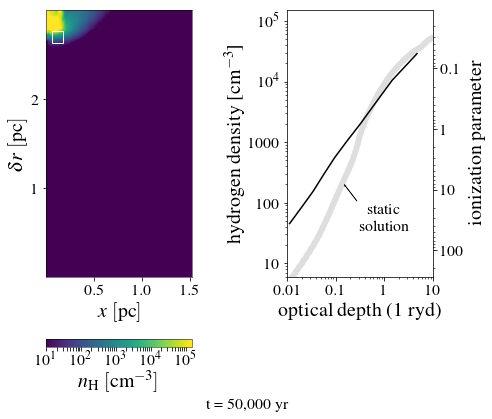

In [16]:
RPC_movie(qRP,iT=500,var='nH',rng=(10,1.5e5),ix=10,dx=5)

In [90]:
(30*un.km/un.s)**2, (1e46*un.erg/un.s/(4*pi*100**2*un.pc**2*cons.c) * 0.1 / (1e3*un.cm**-3*cons.m_p)).to('km**2/s**2')

(<Quantity 900. km2 / s2>, <Quantity 1666.75038584 km2 / s2>)

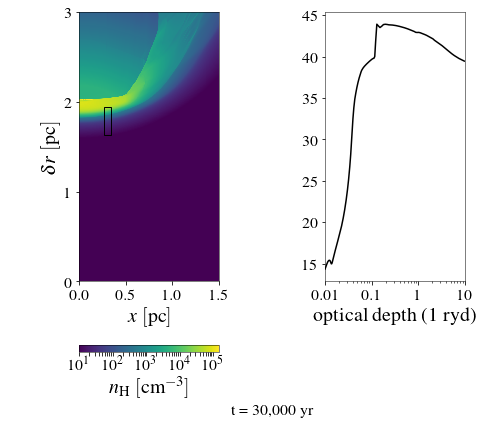

In [85]:
velocity_profile(qRP,iT=300,var='nH',rng=(10,1.5e5),ix=205)

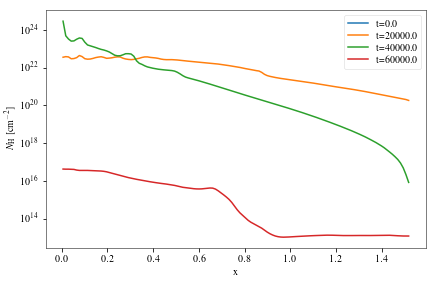

In [8]:
u.figure();
[u.plot(qRP[i].x.cgs(),qRP[i].NH.cgs()[-1,:],
        label='t=%s'%u.nSignificantDigits(qRP[i].t.cgs(),2)) for i in iSnapshots]
u.semilogy()
u.xlabel('x'); u.ylabel(r'$N_{\rm H}$ [cm$^{-2}$]'); u.legend()
u.mysavefig('column_density')

In [10]:
skewers((qGP,),'r',('v_r',),rngs=((-200,200),), iTs=iSnapshots,ix=10,logy=False)
#u.mysavefig('skewers_vs_dr')

NameError: name 'qGP' is not defined

figure 6: n,T,P skewers:
* why is T~10^4K all the way??
* timesteps should be ~10^5 yr, add t=0
* why does low-nH front in RP solution not reach higher T?
* compression effect should be stronger in r=100 run

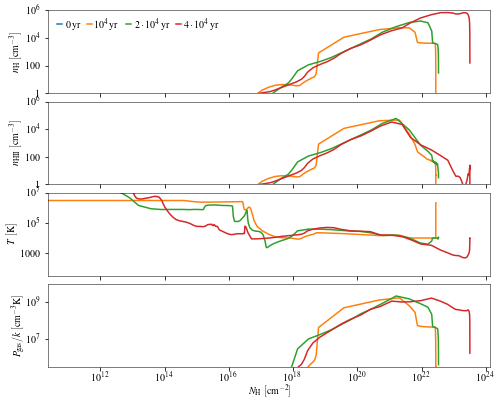

In [25]:
skewers((qRP,),'NH',('nH','nHII','T','P2k'),rngs=rngs, iTs=iSnapshots,logx=True,ix=5)

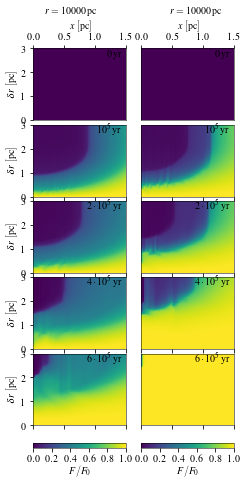

In [14]:
nTplot2D((qGP,qGP2),iSnapshots,('F2F0',),rngs=((0,1),))
# u.savefig(u.figureDir+'images_fluxfrac.png')

figure 7: images of absorbed fraction

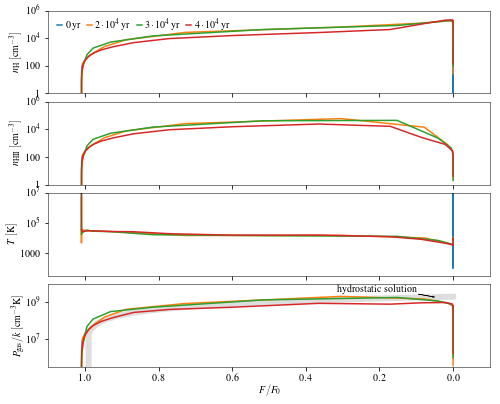

In [18]:
skewers((qRP,),'F2F0',('nH','nHII','T','P2k'),rngs=rngs, iTs=iSnapshots,ix=20)
# u.mysavefig('skewers_vs_absflux')

figure 8: skewers vs. absorbed flux fraction
* why isn't T vs F/F0 constant???
* wiggle at 10^5 year could be do to inaccurate calculation of mu in python code

In [6]:
execfile('pysrc/RPC_Hydro.py')
import os

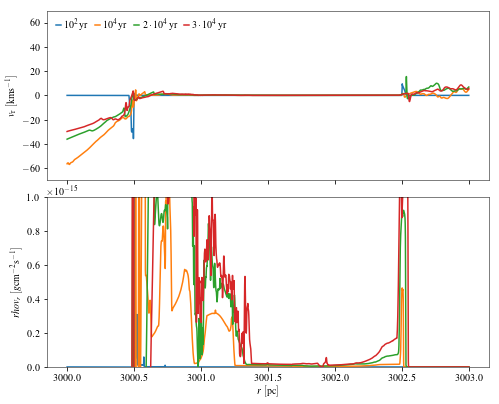

In [9]:
iSnapshots = [1,100,200,300]
skewers((qGP,),'r',('v_r','mass_flux'),rngs=((-70,70),(0,1e4*1e-24*1e5)), iTs=iSnapshots,ix=0,logy=False)
# u.mysavefig('skewers_vs_absflux')

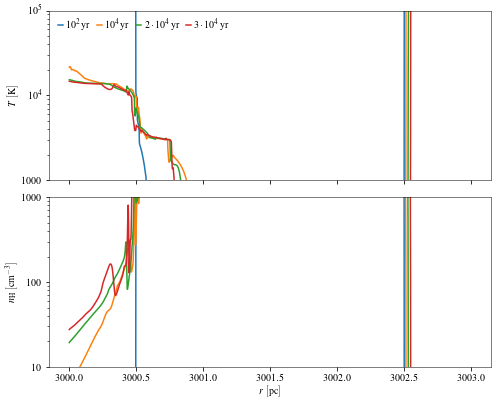

In [10]:
skewers((qGP,),'r',('T','nH'),rngs=((1e3,1e5),(10,1000)), iTs=iSnapshots,ix=0)
# u.mysavefig('skewers_vs_absflux')

In [12]:
(14*un.km/un.s)**2 * u.ln(10.)

<Quantity 451.30667823 km2 / s2>

In [13]:
25**2

625

In [11]:
((cons.k_B*1.5e4*un.K / (0.6*cons.m_p))**0.5).to('km/s')

<Quantity 14.36523322 km / s>

In [ ]:
nTplot2D((qRP,qGP),iSnapshots,('Lgas2Omega','Liondust2Omega'),rngs=((0,1e46),(0,1e46)))
# u.savefig(u.figureDir+'images_L.png')

figure 9: L images
* normalization should be to total cloud luminosity?
* same range of dust and gas
* dust luminosity calculation inaccurate
* colormap
* colorbar location and format
* note radii
* y-axis is delta-r rather than r
* square panels, not rectangles
* times should go up to 200,000 yr
* explain Xi

In [13]:
0.01*un.pc / (2*cons.G*1e9*un.Msun/cons.c**2).to('pc')

<Quantity 104.48412772>

In [14]:
(1e46*un.erg/un.s/(4*pi*0.01**2*un.pc**2*cons.c*2*cons.k_B*1e4*un.K)).to('cm**-3')

<Quantity 1.00961365e+13 1 / cm3>

In [78]:
reload(Table)

<module 'Table' from 'pysrc/Table.py'>

In [79]:
(qRP[0].F0.cgs()*un.erg*un.s**-1*un.cm**-2 * pp.ionFluxFraction / pp.meanhnu / cons.c).to('cm**-3').mean()

<Quantity 2319.86314689 1 / cm3>

15.0 18.0 -
15.0 23.0 --
23.0 18.0 -.
23.0 23.0 :


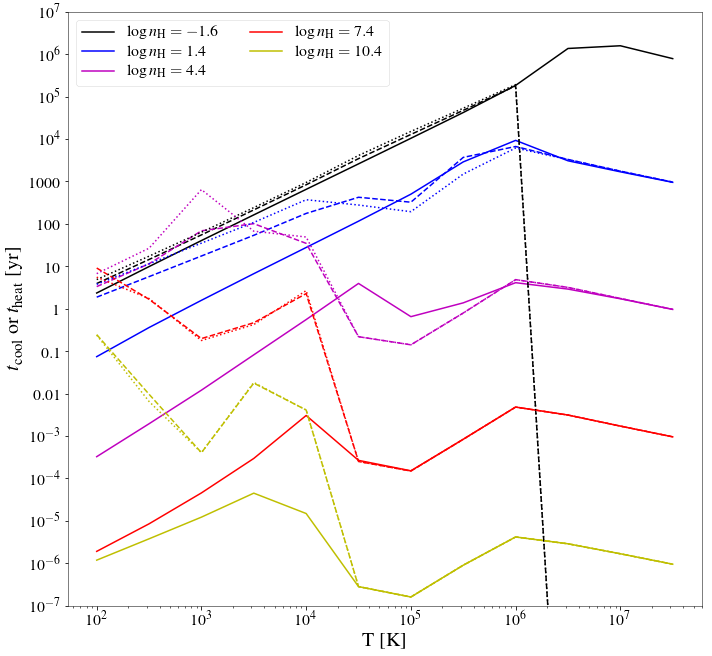

In [81]:
Table.plotCoolingTime(qRP.netCoolingTable,log(_.value))
u.mysavefig('tcools')